<a href="https://colab.research.google.com/github/MiguelOrtega630/IA_2025/blob/main/Clase_6_%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
from graphviz import Source
from IPython.display import Image

In [ ]:
display(Image(url= "https://bakerenvironmentalnursery.com/wp-content/uploads/2015/04/Blue_Flag_Ottawa-1024x1024.jpg"))

In [ ]:
print("Features name - ", iris.feature_names)
print(iris.target)
print("Flor setosa", iris.data[0])
print("Flor versicolor", iris.data[50])
print("Flor virginica", iris.data[100])

Features name -  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Flor setosa [5.1 3.5 1.4 0.2]
Flor versicolor [7.  3.2 4.7 1.4]
Flor virginica [6.3 3.3 6.  2.5]


In [ ]:
import numpy as np

test_indices=[0,1,50,51,100,101]

train_target=np.delete(iris.target,test_indices)
train_data=np.delete(iris.data,test_indices,axis=0)

test_target=iris.target[test_indices]
test_data=iris.data[test_indices]

In [ ]:
dtClassifier=tree.DecisionTreeClassifier(random_state=2022)
dtClassifier.fit(train_data,train_target)

DecisionTreeClassifier(random_state=2022)

In [ ]:
print("\n*************Resultados**********")
for p in range(len(test_indices)):
  print(f"Test Row{test_indices[p]} pertenece a la clase {test_target[p]}")


*************Resultados**********
Test Row0 pertenece a la clase 0
Test Row1 pertenece a la clase 0
Test Row50 pertenece a la clase 1
Test Row51 pertenece a la clase 1
Test Row100 pertenece a la clase 2
Test Row101 pertenece a la clase 2


In [ ]:
predicted_target=dtClassifier.predict(test_data)
print("\n*************Resultados**********")
for p in range(len(test_indices)):
  print(f"Test Row{test_indices[p]} pertenece a la clase {test_target[p]}")


*************Resultados**********
Test Row0 pertenece a la clase 0
Test Row1 pertenece a la clase 0
Test Row50 pertenece a la clase 1
Test Row51 pertenece a la clase 1
Test Row100 pertenece a la clase 2
Test Row101 pertenece a la clase 2


In [ ]:
graph=Source(tree.export_graphviz(dtClassifier, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True,rounded=True,node_ids=True))
graph.format="png"
graph.render("dtree_render",view=True)

display (Image(url= "dtree_render.png"))

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
iris2=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
iris2.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
137,6.4,3.1,5.5,1.8,2.0
89,5.5,2.5,4.0,1.3,1.0
129,7.2,3.0,5.8,1.6,2.0
97,6.2,2.9,4.3,1.3,1.0
95,5.7,3.0,4.2,1.2,1.0


In [ ]:
print(f"Tamaño del dataframe:{iris2.shape}")

Tamaño del dataframe:(150, 5)


In [ ]:
x_train,x_test, y_train, x_test = train_test_split(iris2.drop(columns=["target"]), iris2["target"],train_size=0.7,random_state=1279)

In [ ]:
modelo_flor=DecisionTreeRegressor(random_state=2022)
modelo_flor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=2022)

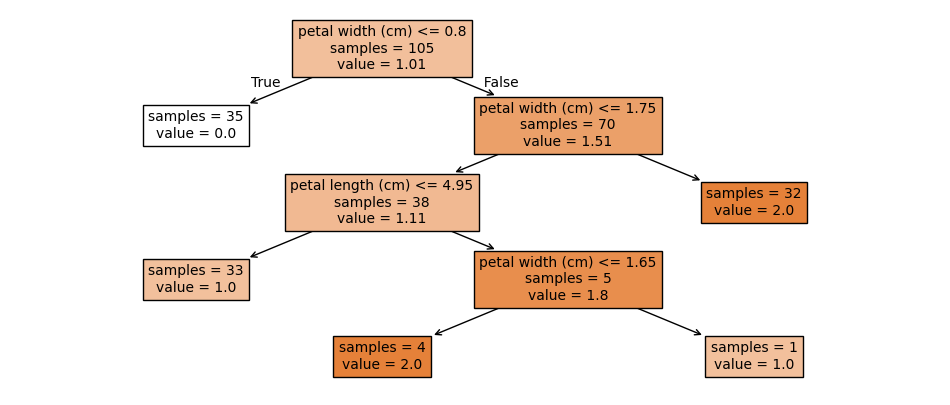

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plot=plot_tree(decision_tree=modelo_flor,feature_names=iris2.drop(columns=["target"]).columns,
               filled=True,
               impurity=False,
               fontsize=10,
               precision=2,
               ax=ax)

In [ ]:
import kagglehub


path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
pima=pd.read_csv(path+"/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(f"Tamaño del dataframe:{pima.shape}")

Tamaño del dataframe:(768, 9)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    pima.drop(columns=["Outcome"]),
    pima["Outcome"],
    train_size=0.7,
    random_state=1279
)

In [ ]:
modelo_diabetes = DecisionTreeRegressor(random_state=2022)

In [ ]:
modelo_diabetes.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2022)

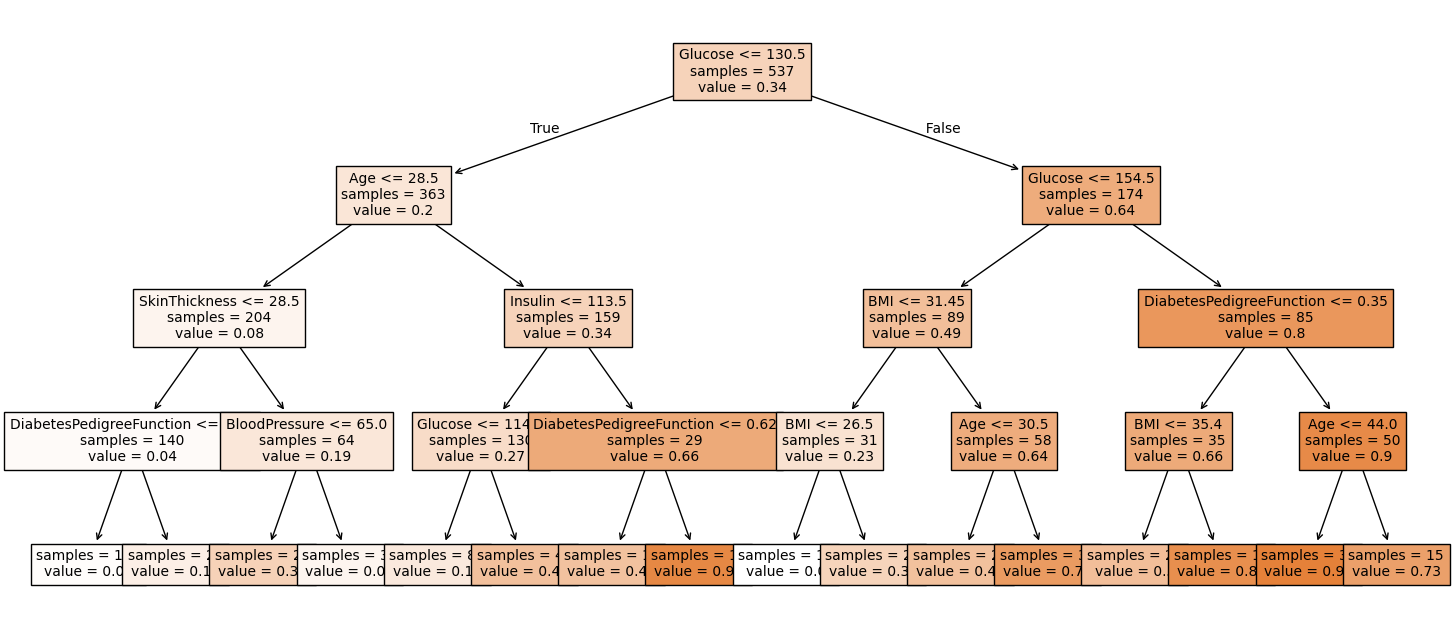

In [ ]:
modelo_diabetes = DecisionTreeRegressor(
    random_state=2022,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5
)

modelo_diabetes.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(18, 8))
plot_tree(
    decision_tree=modelo_diabetes,
    feature_names=pima.drop(columns=["Outcome"]).columns,
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)
plt.show()

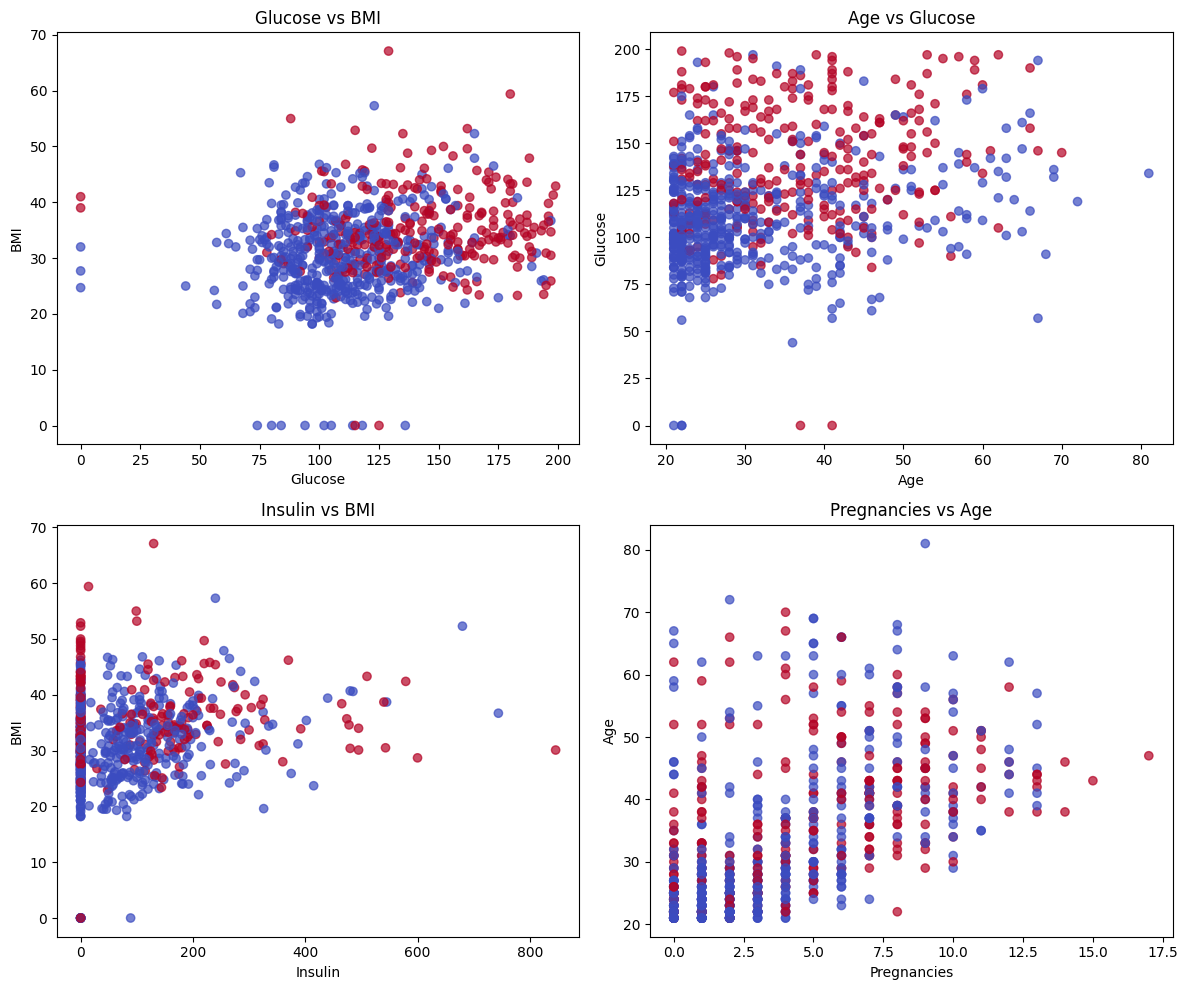

In [ ]:

import matplotlib.pyplot as plt

# Creamos la figura con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

# ---- Gráfico 1 ----
axes[0,0].scatter(pima['Glucose'], pima['BMI'],
                  c=pima['Outcome'], cmap='coolwarm', alpha=0.7)
axes[0,0].set_xlabel('Glucose')
axes[0,0].set_ylabel('BMI')
axes[0,0].set_title('Glucose vs BMI')

# ---- Gráfico 2 ----
axes[0,1].scatter(pima['Age'], pima['Glucose'],
                  c=pima['Outcome'], cmap='coolwarm', alpha=0.7)
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Glucose')
axes[0,1].set_title('Age vs Glucose')

# ---- Gráfico 3 ----
axes[1,0].scatter(pima['Insulin'], pima['BMI'],
                  c=pima['Outcome'], cmap='coolwarm', alpha=0.7)
axes[1,0].set_xlabel('Insulin')
axes[1,0].set_ylabel('BMI')
axes[1,0].set_title('Insulin vs BMI')

# ---- Gráfico 4 ----
axes[1,1].scatter(pima['Pregnancies'], pima['Age'],
                  c=pima['Outcome'], cmap='coolwarm', alpha=0.7)
axes[1,1].set_xlabel('Pregnancies')
axes[1,1].set_ylabel('Age')
axes[1,1].set_title('Pregnancies vs Age')

# Ajustes de diseño
plt.tight_layout()
plt.show()
